https://cambridgespark.com/content/tutorials/quick-panda-tricks/index.html


In [1466]:
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np

In [1188]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [1189]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1191]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frolicher, Miss. Hedwig Margaritha",male,347082,G6,S
freq,1,577,7,4,644


In [1192]:
#train['Age'].fillna(train['Age'].median(), inplace=True)
#train.describe()

What is the distribution of categorical features?

Names are unique across the dataset (count=unique=891)
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
Embarked takes three possible values. S port used by most passengers (top=S)
Ticket feature has high ratio (22%) of duplicate values (unique=681).

Charts of sex

In [1193]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


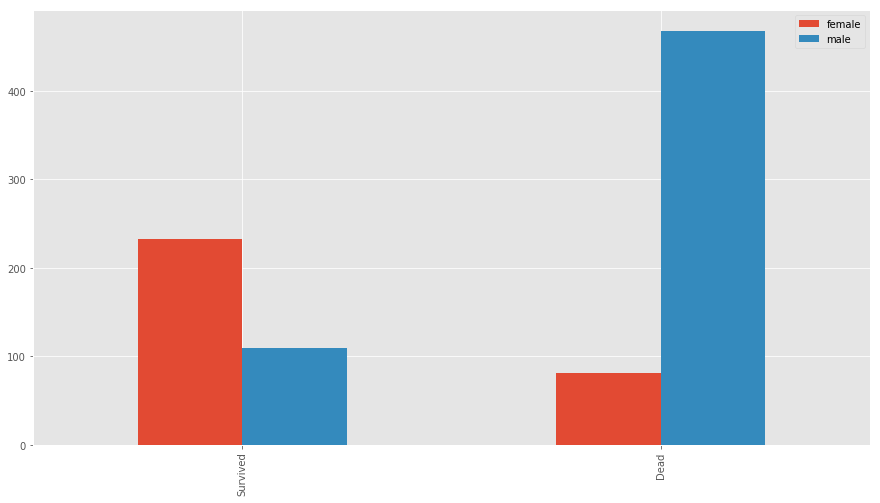

In [1194]:
survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8))

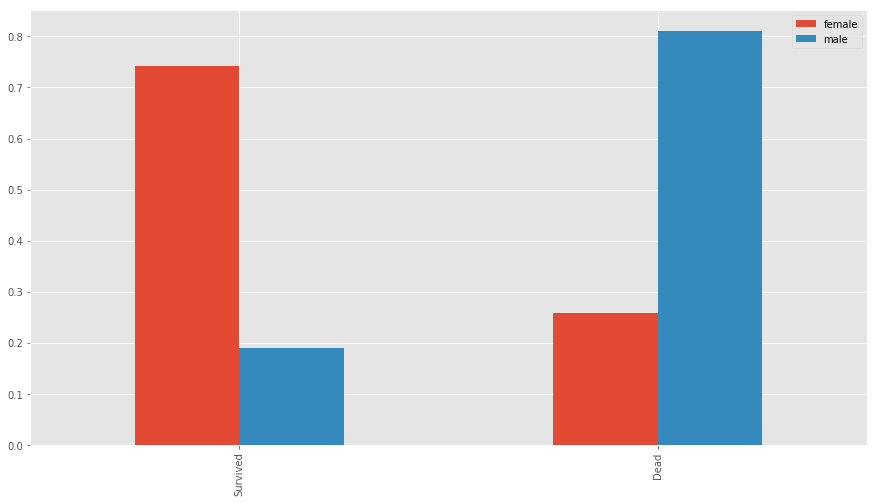

In [1195]:
#total_sex = train['Sex'].count()
total_sex = train['Sex'].value_counts()
#print(train[train['Survived']==1]['Sex'].value_counts() )

p_survived_sex = train[train['Survived']==1]['Sex'].value_counts() / total_sex
p_dead_sex = train[train['Survived']==0]['Sex'].value_counts() / total_sex
df = pd.DataFrame([p_survived_sex,p_dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8))


Charts of Pclass

/home/chtseng/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


ValueError: max must be larger than min in range parameter.

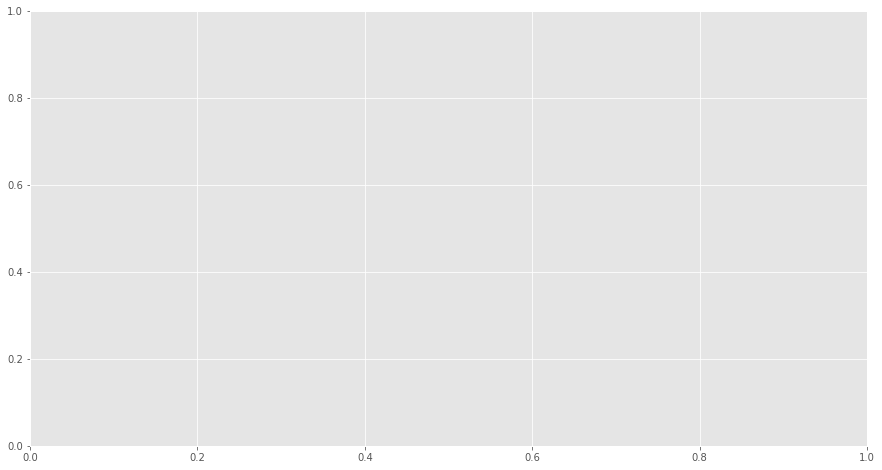

In [1196]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Sex']=='male']['Age'], train[train['Sex']=='female']['Age']], stacked=False, color = ['g','r'],
         bins = 30,label = ['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Number of Sex')
plt.legend()

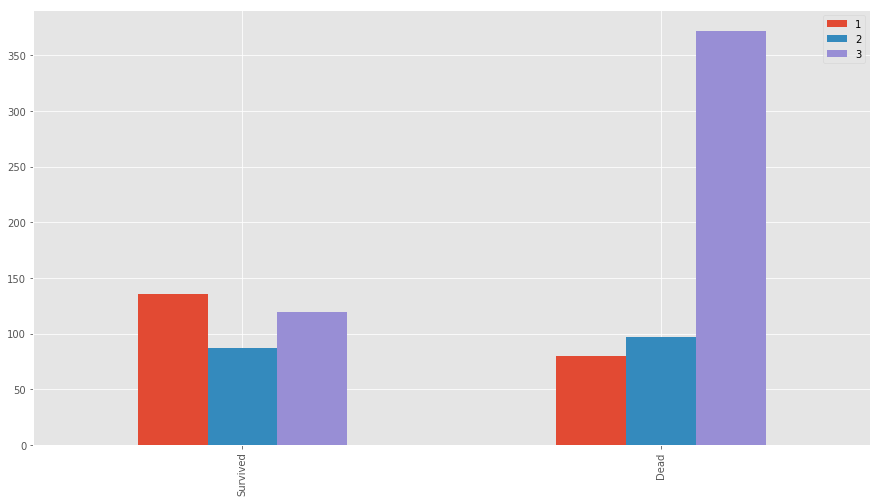

In [1197]:
survived_pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass = train[train['Survived']==0]['Pclass'].value_counts()


df = pd.DataFrame([survived_pclass,dead_pclass])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8))

In [1198]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


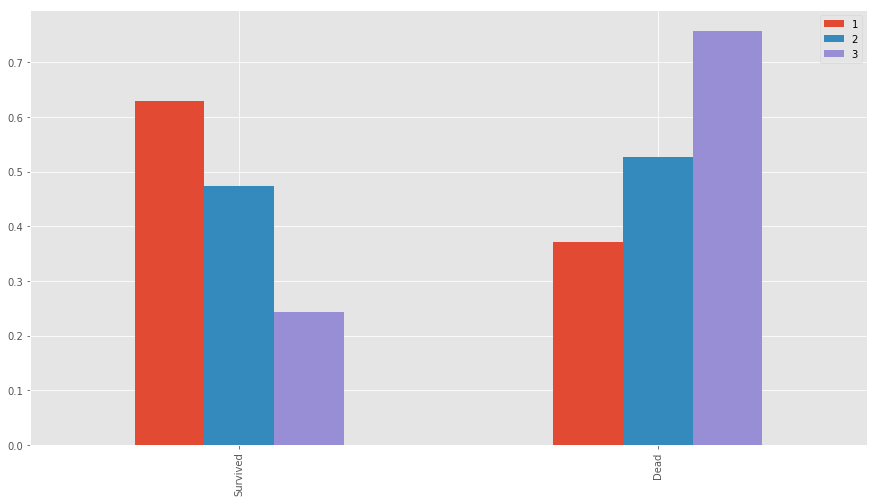

In [1199]:

total_pclass = train['Pclass'].value_counts()
survived_pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass = train[train['Survived']==0]['Pclass'].value_counts()
p_survived_pclass = survived_pclass / total_pclass
p_dead_pclass = dead_pclass / total_pclass

df = pd.DataFrame([p_survived_pclass,p_dead_pclass])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8))

Charts of sex & Pclass

In [1200]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


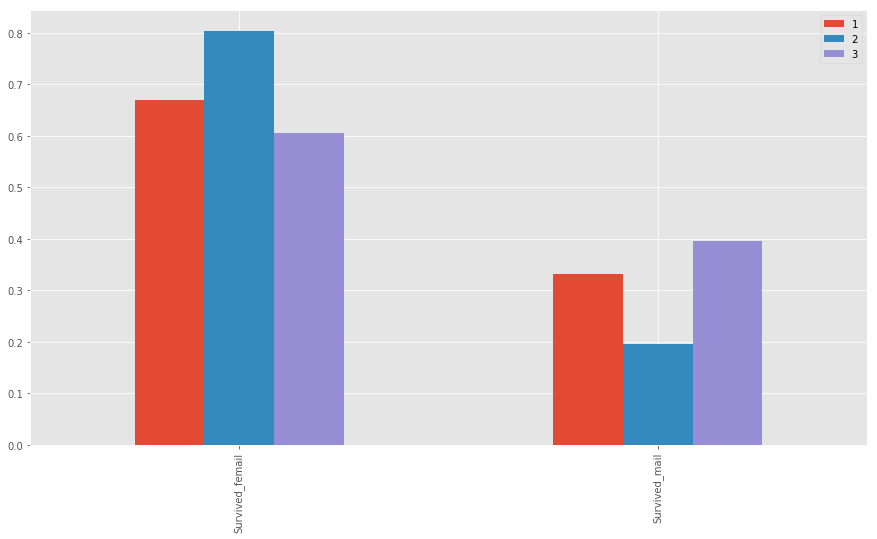

In [1201]:
survived_pclass_total = train[train['Survived']==1]['Pclass'].value_counts()
survived_pclass_female = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].value_counts()
survived_pclass_male = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].value_counts()

p_survived_pclass_female = survived_pclass_female / survived_pclass_total
p_survived_pclass_male = survived_pclass_male / survived_pclass_total

df = pd.DataFrame([p_survived_pclass_female[[1,2,3]],p_survived_pclass_male[[1,2,3]]])
df.index = ['Survived_femail','Survived_mail']
df.plot(kind='bar',stacked=False, figsize=(15,8))

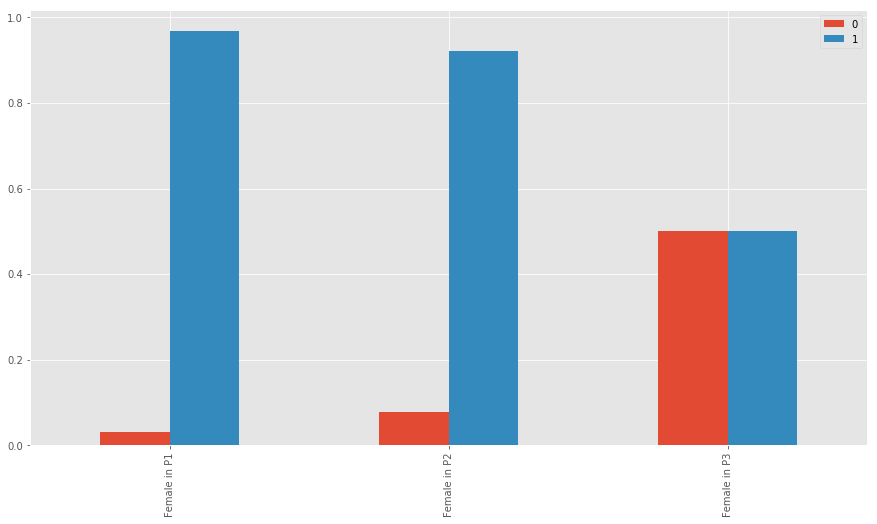

In [1202]:
total_female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].count()
female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p1

total_female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].count()
female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p2

total_female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].count()
female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p3

df = pd.DataFrame([female_p1[[0, 1]],female_p2[[0, 1]],female_p3[[0, 1]]])
df.index = ['Female in P1','Female in P2', 'Female in P3']
df.plot(kind='bar',stacked=False, figsize=(15,8))


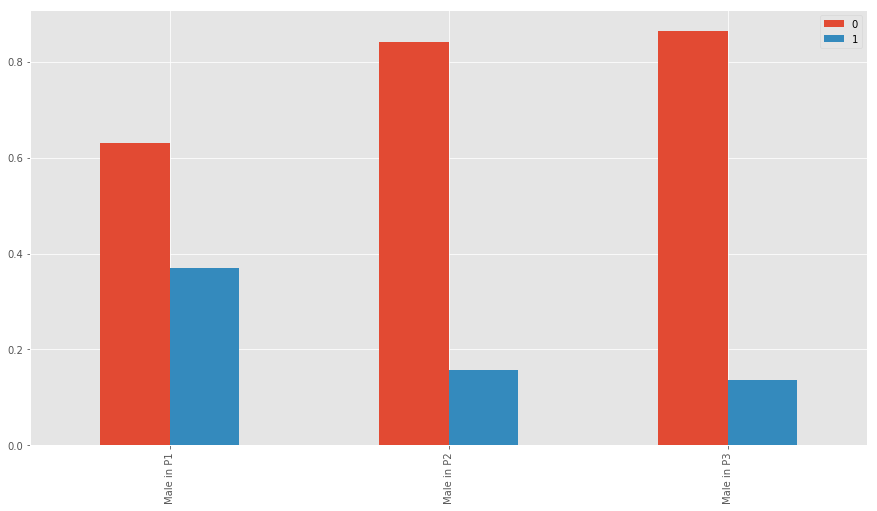

In [1203]:
total_male_p1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].count()
male_p1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p1

total_male_p2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].count()
male_p2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p2

total_male_p3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].count()
male_p3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p3

df = pd.DataFrame([male_p1[[0, 1]],male_p2[[0, 1]],male_p3[[0, 1]]])
df.index = ['Male in P1','Male in P2', 'Male in P3']
df.plot(kind='bar',stacked=False, figsize=(15,8))

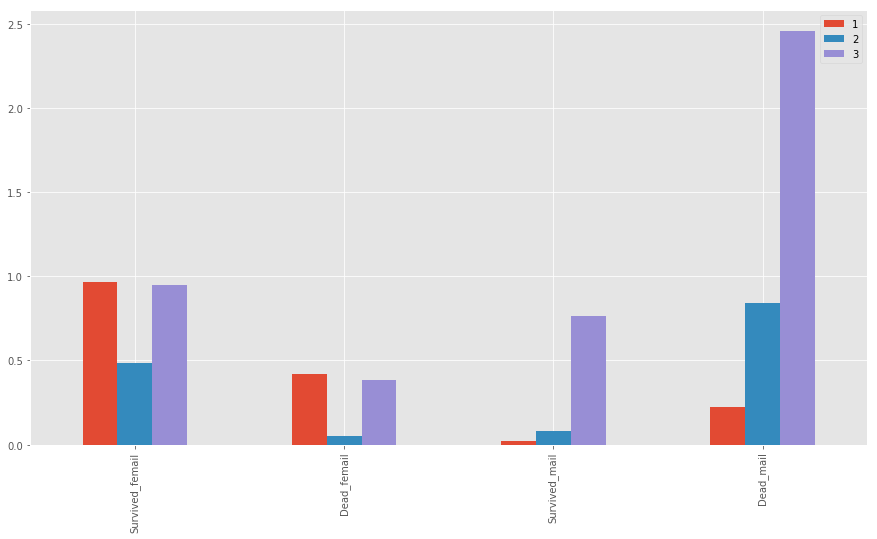

In [1204]:
total_female_pclass_1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].count()

total_female_pclass_2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].count()

total_female_pclass_3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].count()

survived_female_pclass = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].value_counts()
survived_male_pclass = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].value_counts()
dead_pclass_female = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].value_counts()
dead_pclass_male = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].value_counts()

p_survived_pclass_female = (survived_pclass_female / [total_female_pclass_1, total_female_pclass_2, total_female_pclass_3]) 
p_survived_pclass_male = (survived_pclass_male / [total_male_pclass_1, total_male_pclass_2, total_male_pclass_3]) 
p_dead_pclass_female = (dead_pclass_female / [total_female_pclass_1, total_female_pclass_2, total_female_pclass_3]) 
p_dead_pclass_male = (dead_pclass_male / [total_male_pclass_1, total_male_pclass_2, total_male_pclass_3]) 

df = pd.DataFrame([p_survived_pclass_female,p_survived_pclass_male,p_dead_pclass_female,p_dead_pclass_male])
df.index = ['Survived_femail','Dead_femail','Survived_mail','Dead_mail']
df.plot(kind='bar',stacked=False, figsize=(15,8))

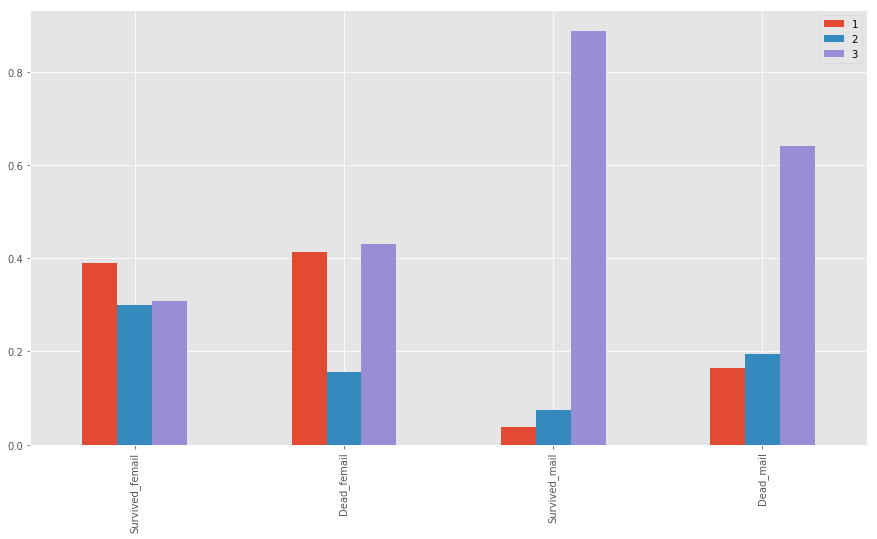

In [1205]:
total_female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].count()
total_male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].count()

total_female_dead = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].count()
total_male_dead = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].count()

survived_pclass_female = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].value_counts()
survived_pclass_male = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].value_counts()
dead_pclass_female = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].value_counts()
dead_pclass_male = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].value_counts()

p_survived_pclass_female = (survived_pclass_female / total_female_survived) 
p_survived_pclass_male = (survived_pclass_male / total_male_survived) 
p_dead_pclass_female = (dead_pclass_female / total_female_dead) 
p_dead_pclass_male = (dead_pclass_male / total_male_dead) 

df = pd.DataFrame([p_survived_pclass_female,p_survived_pclass_male,p_dead_pclass_female,p_dead_pclass_male])
df.index = ['Survived_femail','Dead_femail','Survived_mail','Dead_mail']
df.plot(kind='bar',stacked=False, figsize=(15,8))

Charts of Age

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.


In [1206]:
d1 = train[['Age', 'Survived']].groupby(['Age'], as_index=False).count().sort_values(by='Survived', ascending=False)
d2 = train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

pd.concat([d1, d2], axis=1)

,Age,Survived,Age,Survived
0,0.42,1,0.42,1.000000
1,0.67,1,0.67,1.000000
2,0.75,2,0.75,1.000000
3,0.83,2,0.83,1.000000
4,0.92,1,0.92,1.000000
5,1.00,7,1.00,0.714286
6,2.00,10,2.00,0.300000
7,3.00,6,3.00,0.833333
8,4.00,10,4.00,0.700000
9,5.00,4,5.00,1.000000


In [1207]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


/home/chtseng/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


ValueError: max must be larger than min in range parameter.

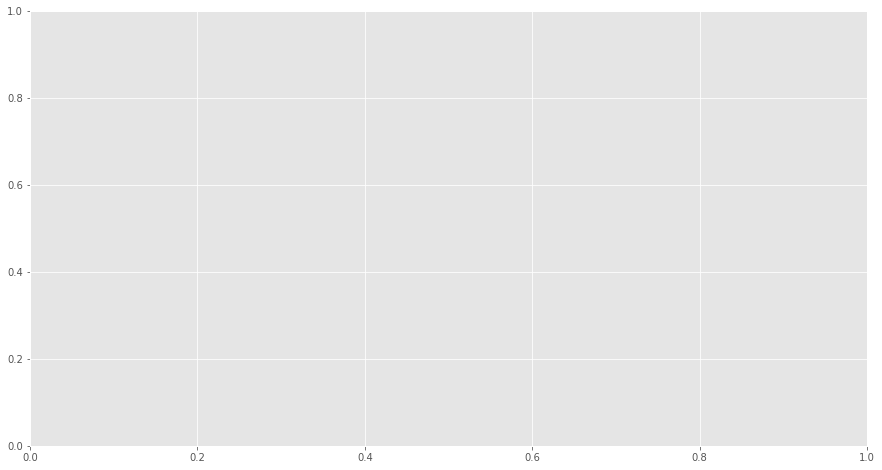

In [1208]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Fare titcks

In [1209]:
train['Family'] = train['SibSp'] + train['Parch']
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


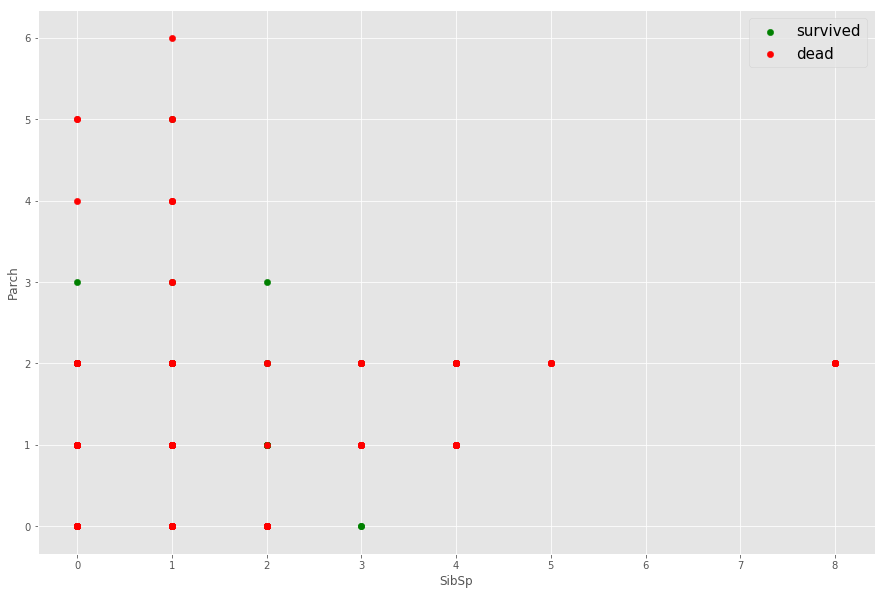

In [1210]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['SibSp'],train[train['Survived']==1]['Parch'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['SibSp'],train[train['Survived']==0]['Parch'],c='red',s=40)
ax.set_xlabel('SibSp')
ax.set_ylabel('Parch')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

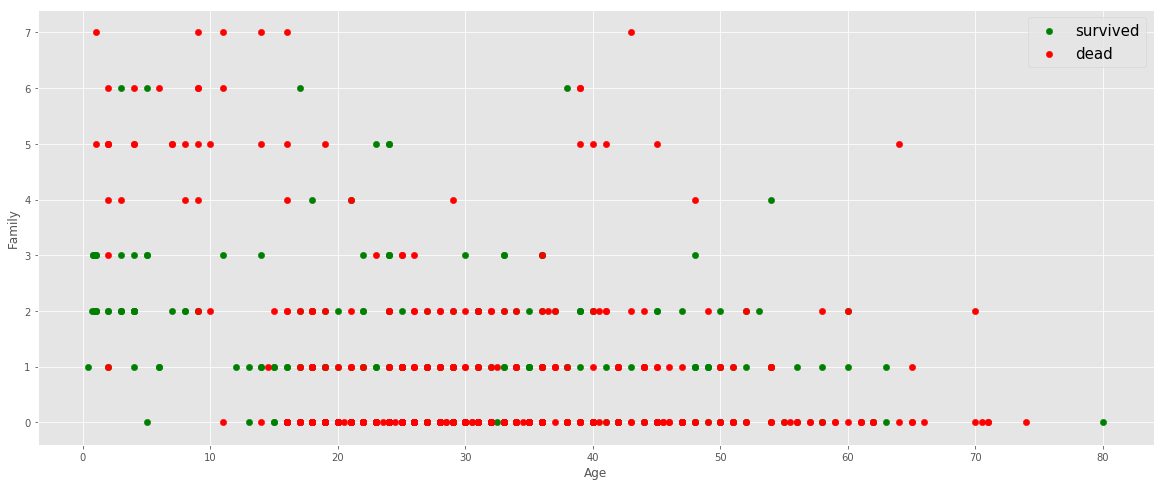

In [1211]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(20,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Family'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Family'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Family')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

/home/chtseng/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


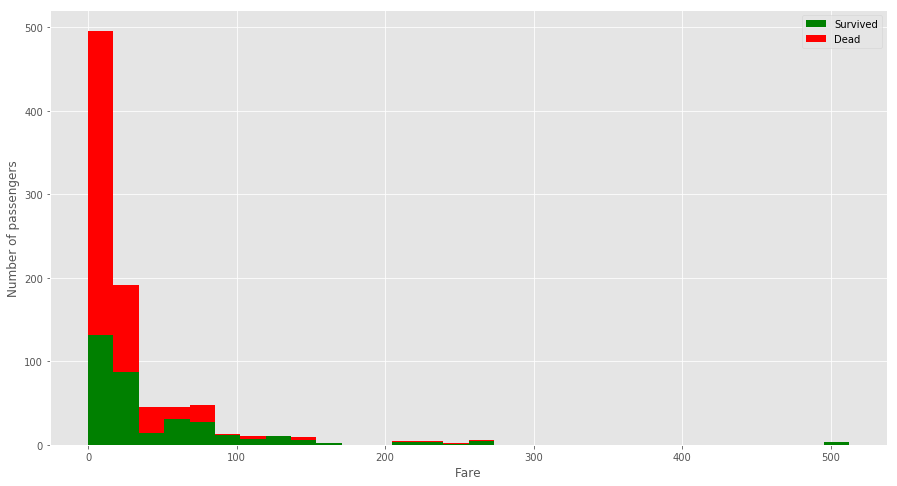

In [1212]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

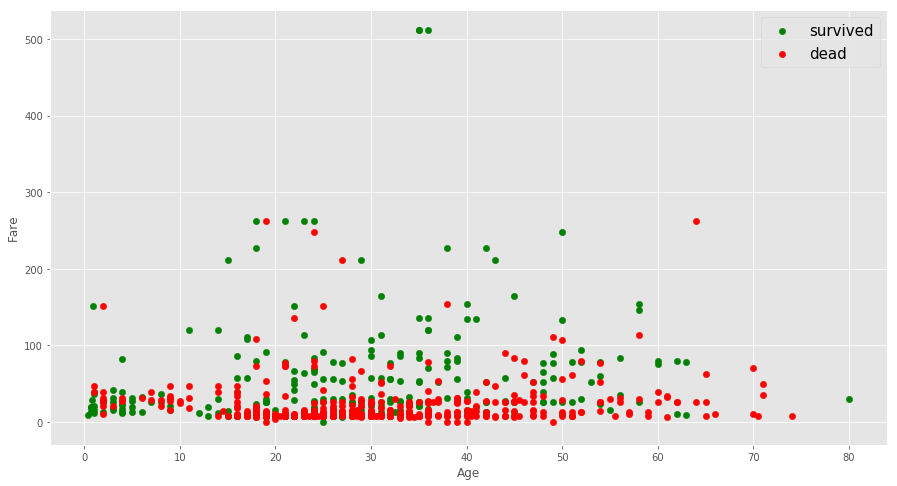

In [1213]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

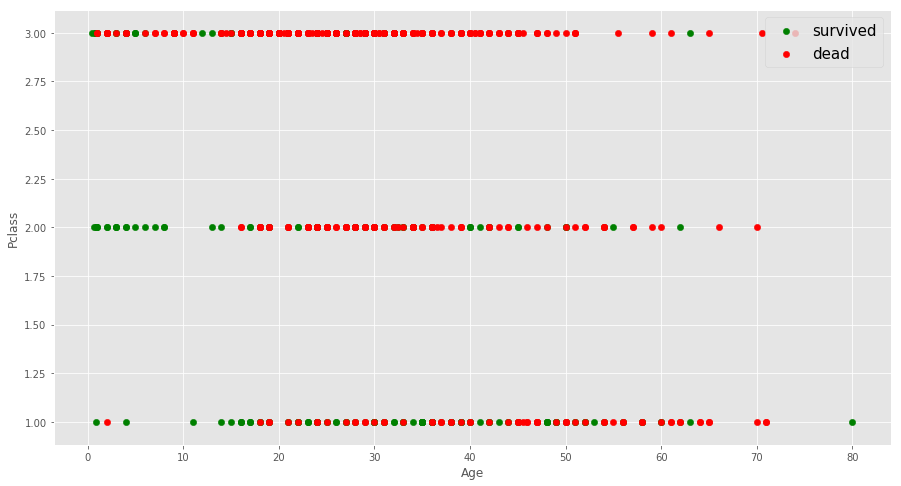

In [1214]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Pclass'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Pclass'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

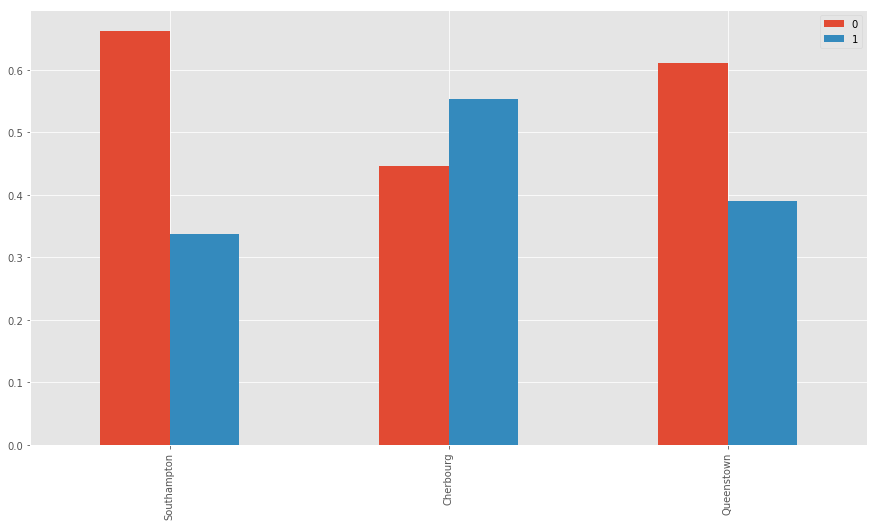

In [1215]:
total_Embarked_S = train[train['Embarked']=='S']['Survived'].count()
total_Embarked_C = train[train['Embarked']=='C']['Survived'].count()
total_Embarked_Q = train[train['Embarked']=='Q']['Survived'].count()

Embarked_S = train[train['Embarked']=='S']['Survived'].value_counts() / total_Embarked_S
Embarked_C = train[train['Embarked']=='C']['Survived'].value_counts() / total_Embarked_C
Embarked_Q = train[train['Embarked']=='Q']['Survived'].value_counts() / total_Embarked_Q   
              
df = pd.DataFrame([Embarked_S,Embarked_C,Embarked_Q])
df.index = ['Southampton','Cherbourg','Queenstown']
df.plot(kind='bar',stacked=False, figsize=(15,8))

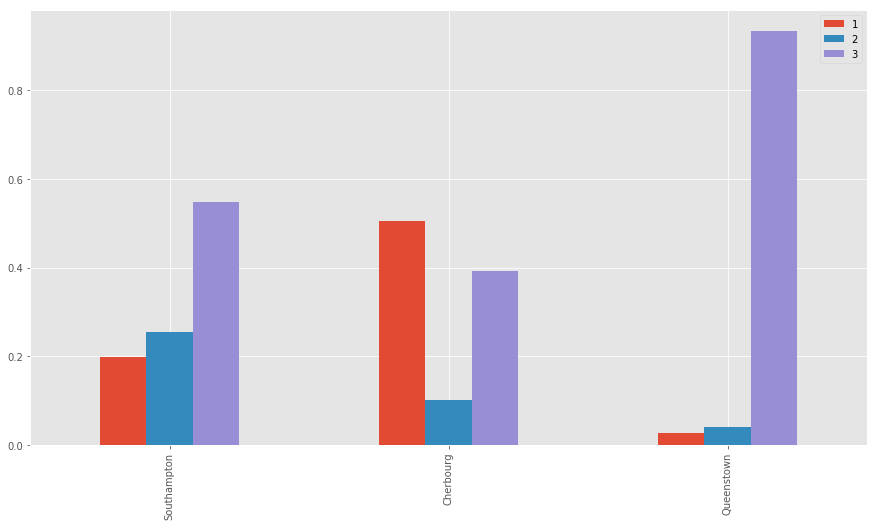

In [1216]:
total_Pclass_S = train[train['Embarked']=='S']['Pclass'].count()
total_Pclass_C = train[train['Embarked']=='C']['Pclass'].count()
total_Pclass_Q = train[train['Embarked']=='Q']['Pclass'].count()

Embarked_S = train[train['Embarked']=='S']['Pclass'].value_counts() / total_Pclass_S
Embarked_C = train[train['Embarked']=='C']['Pclass'].value_counts() / total_Pclass_C
Embarked_Q = train[train['Embarked']=='Q']['Pclass'].value_counts() / total_Pclass_Q   
              
df = pd.DataFrame([Embarked_S,Embarked_C,Embarked_Q])
df.index = ['Southampton','Cherbourg','Queenstown']
df.plot(kind='bar',stacked=False, figsize=(15,8))

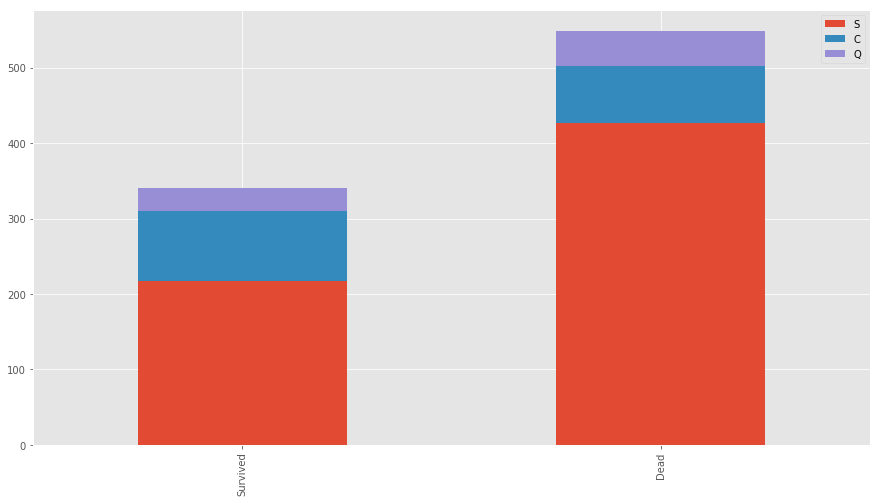

In [1217]:
survived_embark = train[train['Survived']==1]['Embarked'].value_counts()
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

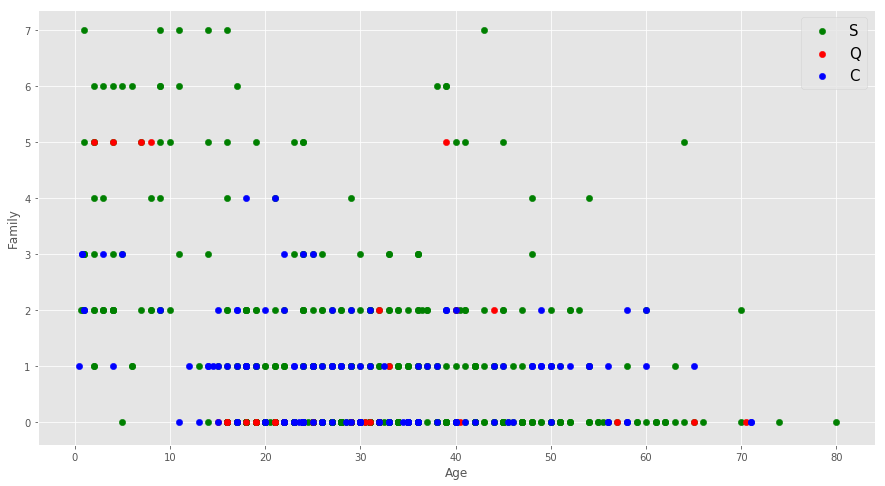

In [1868]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Embarked']=='S']['Age'],train[train['Embarked']=='S']['Family'],c='green',s=40)
ax.scatter(train[train['Embarked']=='Q']['Age'],train[train['Embarked']=='Q']['Family'],c='red',s=40)
ax.scatter(train[train['Embarked']=='C']['Age'],train[train['Embarked']=='C']['Family'],c='blue',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Family')
ax.legend(('S','Q','C'),scatterpoints=1,loc='upper right',fontsize=15,)

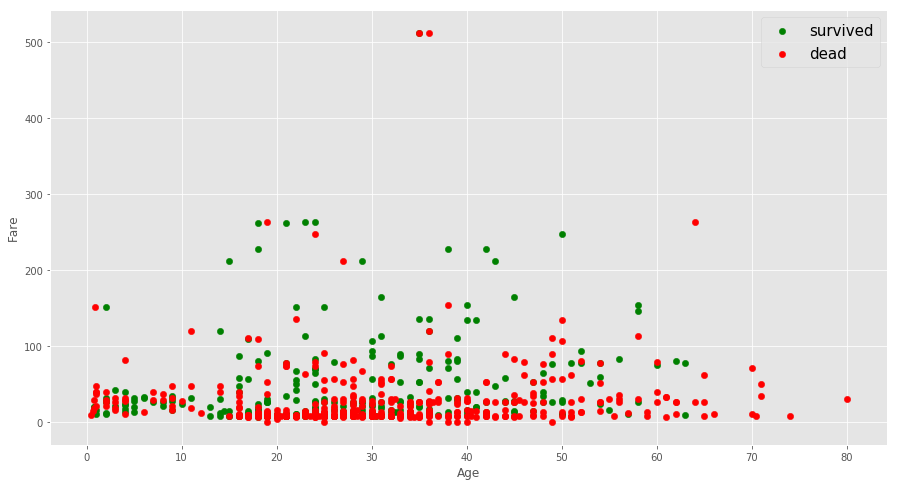

In [1651]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Sex']=='female']['Age'],train[train['Sex']=='female']['Fare'],c='green',s=40)
ax.scatter(train[train['Sex']=='male']['Age'],train[train['Sex']=='male']['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

In [1869]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y_train = train.Survived
Y_train_onehot = pd.get_dummies(train['Survived']).values
X_train = train.append(test)

In [1870]:
for title in ["Mr.", "Sir.", "Dr.", "Major.", "Master."]:
    num = X_train[(X_train['Name'].str.contains(title))]["Name"].count()
    age = X_train[(X_train['Name'].str.contains(title))]["Age"].mean()
    
    print("{} --> {} males, Age average is {}".format(title, num, age))

print("-------------------------------------------------------------")

for title in ["Ms.", "Miss.", "Mrs.", "Lady."]:
    num = X_train[(X_train['Name'].str.contains(title))]["Name"].count()
    age = X_train[(X_train['Name'].str.contains(title))]["Age"].mean()
    
    print("{} --> {} females, Age average is {}".format(title, num, age))

Mr. --> 959 males, Age average is 33.32208994708995
Sir. --> 3 males, Age average is 35.5
Dr. --> 17 males, Age average is 37.266666666666666
Major. --> 2 males, Age average is 48.5
Master. --> 61 males, Age average is 5.482641509433963
-------------------------------------------------------------
Ms. --> 2 females, Age average is 28.0
Miss. --> 260 females, Age average is 21.774238095238097
Mrs. --> 201 females, Age average is 36.804597701149426
Lady. --> 1 females, Age average is 48.0


In [1871]:
for title in ["Mr.", "Sir.", "Dr.", "Major.", "Master."]:
    num_survived = X_train[(X_train['Survived']==1) & (X_train['Name'].str.contains(title))]["Name"].count()
    num_died = X_train[(X_train['Survived']==0) & (X_train['Name'].str.contains(title))]["Name"].count()
    #print(num_survived, num_died)
    print("{} total:{} --> {} survived, {} died. {}% survived".format(title, num_survived+num_died, num_survived, num_died, (100*num_survived/(num_survived+num_died))))

print("-------------------------------------------------------------")

for title in ["Ms.", "Miss.", "Mrs.", "Lady."]:
    num_survived = X_train[(X_train['Survived']==1) & (X_train['Name'].str.contains(title))]["Name"].count()
    num_died = X_train[(X_train['Survived']==0) & (X_train['Name'].str.contains(title))]["Name"].count()
    
    print("{} total:{} --> {} survived, {} died. {}% survived".format(title, num_survived+num_died, num_survived, num_died, (100*num_survived/(num_survived+num_died))))

Mr. total:647 --> 184 survived, 463 died. 28.438948995363216% survived
Sir. total:3 --> 1 survived, 2 died. 33.333333333333336% survived
Dr. total:11 --> 6 survived, 5 died. 54.54545454545455% survived
Major. total:2 --> 1 survived, 1 died. 50.0% survived
Master. total:40 --> 23 survived, 17 died. 57.5% survived
-------------------------------------------------------------
Ms. total:1 --> 1 survived, 0 died. 100.0% survived
Miss. total:182 --> 127 survived, 55 died. 69.78021978021978% survived
Mrs. total:129 --> 102 survived, 27 died. 79.06976744186046% survived
Lady. total:1 --> 1 survived, 0 died. 100.0% survived


In [1872]:
X_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [1873]:
def fill_Age():
    global X_train
    
    mask =  (X_train["Age"].isnull()) & ( (X_train['Name'].str.contains("Ms.")) | (X_train['Name'].str.contains("Miss.")) )
    mask2 = ( (X_train['Name'].str.contains("Ms.")) | (X_train['Name'].str.contains("Miss.")) )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2,'Age'].mean())
    
    mask =  (X_train["Age"].isnull()) & ( (X_train['Name'].str.contains("Mr.")) | (X_train['Name'].str.contains("Sir.")) )
    mask2 =  ( (X_train['Name'].str.contains("Mr.")) | (X_train['Name'].str.contains("Sir.")) )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2,'Age'].mean())
    
    mask =  (X_train["Age"].isnull()) & ( X_train['Name'].str.contains("Master.") )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains("Master.")]["Age"].mean())

    mask =  (X_train["Age"].isnull()) & ( X_train['Name'].str.contains("Dr\.") )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains("Dr\.")]["Age"].mean())


fill_Age()
X_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.961404,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.196057,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.803744,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [1874]:
def update_Fare():
    #X_train[(X_train['Fare']>0.0) & (X_train['Fare']<8.0)].count()
    mask = (X_train['Fare']==0)
    X_train.loc[mask, "Fare"] = 0.0

    mask = (X_train['Fare']>0.0) & (X_train['Fare']<=8.0)
    X_train.loc[mask, "Fare"] = 1.0

    mask = (X_train['Fare']>8.0) & (X_train['Fare']<=15.0)
    X_train.loc[mask, "Fare"] = 2.0

    mask = (X_train['Fare']>15.0) & (X_train['Fare']<=32.0)
    X_train.loc[mask, "Fare"] = 3.0

    mask = (X_train['Fare']>32.0)
    X_train.loc[mask, "Fare"] = 4.0
    
    X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)

update_Fare()

In [1875]:
#def fill_Fare():
#    X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)
    
#fill_Fare()
X_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.961404,2.434683,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.196057,1.150610,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.803744,1.000000,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,2.000000,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,3.000000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,4.000000,9.000000,1309.000000,3.000000,8.000000,1.000000


In [1876]:
def fill_Embarked():
    X_train['Embarked'].fillna("C", inplace=True)
    
fill_Embarked()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


In [1877]:
X_train['Family'] = X_train['Parch'] + X_train['SibSp']
X_train.drop('Parch',axis=1,inplace=True)
X_train.drop('SibSp',axis=1,inplace=True)

In [1878]:
X_train['Cabin'].fillna("-", inplace=True)
cabinList = ["C", "E", "G", "D", "A", "B", "F"]

for Cabin in cabinList:
    mask =  (X_train["Cabin"].str.contains(Cabin))
    X_train.loc[mask,"Cabin"] = Cabin

In [1879]:
def fill_Carbin():
    
    global X_train
    
    X_train['Cabin'].fillna("-", inplace=True)
    cabinList = ["C", "E", "G", "D", "A", "B", "F"]

    for Cabin in cabinList:
        mask =  (X_train["Cabin"].str.contains(Cabin))
        X_train.loc[mask,"Cabin"] = Cabin

   
    mask = (X_train["Pclass"]==3) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "G"

    mask = (X_train["Pclass"]==1) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "B"
    
    mask = (X_train["Pclass"]==2) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "F"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==1)
    #X_train.loc[mask, "Cabin"] = "B"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==2)
    #X_train.loc[mask, "Cabin"] = "F"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==3)
    #X_train.loc[mask, "Cabin"] = "G"

    
fill_Carbin()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,8,3,1307,2,929
top,G,S,"Kelly, Mr. James",male,CA. 2343
freq,702,914,2,843,11


In [1880]:
def fill_Ticket():
    global X_train

    X_train['Ticket'] = X_train['Ticket'].str.extract('([a-zA-Z]*)', expand=False).str.upper()

fill_Ticket()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,8,3,1307,2,21
top,G,S,"Kelly, Mr. James",male,
freq,702,914,2,843,957


In [1881]:
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,8,3,1307,2,21
top,G,S,"Kelly, Mr. James",male,
freq,702,914,2,843,957


In [1882]:
X_train["titleCounts"] = X_train["Name"].str.count("\(")
X_train["NameCounts"] = X_train["Name"].str.count("\ ")

In [1883]:
def fill_Title():
    global X_train
    
    for typeName in ["Ms.", "Miss.", "Mr.", "Sir.", "Major", "Dr.", "Master.", "Mme."]:

        mask =  (X_train['Name'].str.contains(typeName))

        replaceTitle = typeName
        if(typeName=="Mme."):
           replaceTitle = "Ms." 

        X_train.loc[mask,'Title'] = replaceTitle

    
    mask = X_train["Title"].isnull() & (X_train['Age']<14) & (X_train['Sex']=='male')
    X_train.loc[mask, "Title"] = "Master."
    
    mask = X_train["Title"].isnull() & (X_train['Age']>13) & (X_train['Sex']=='male')
    X_train.loc[mask, "Title"] = "Mr."

    mask = X_train["Title"].isnull() & (X_train['Sex']=='female')
    X_train.loc[mask, "Title"] = "Miss."
        
fill_Title()
X_train.drop('Name',axis=1,inplace=True)

X_train.describe(include=['O'])
#print(X_train[X_train["Title"].isnull()])

,Cabin,Embarked,Sex,Ticket,Title
count,1309,1309,1309,1309,1309
unique,8,3,2,21,7
top,G,S,male,,Mr.
freq,702,914,843,957,965


In [1884]:
def oneHotEncode():
    global X_train
    
    X_train.drop('PassengerId', inplace=True, axis=1)    
    X_train['Sex'] = X_train['Sex'].map({'male':1,'female':0})
    
    
    X_train['Embarked'] = X_train['Embarked'].astype('category').cat.codes
    X_train['Pclass'] = X_train['Pclass'].astype('category').cat.codes
    X_train['Title'] = X_train['Title'].astype('category').cat.codes
    X_train['Cabin'] = X_train['Cabin'].astype('category').cat.codes
    X_train['Ticket'] = X_train['Ticket'].astype('category').cat.codes
    
    '''
    dummy = pd.get_dummies(X_train['Pclass'], prefix="Pclass")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Pclass',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Ticket'], prefix="Ticket")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Ticket',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Cabin'], prefix="Cabin")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Cabin',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Embarked'], prefix="Embarked")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Embarked',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Title'], prefix="Title")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Title',axis=1,inplace=True)
    '''
    
oneHotEncode()

In [1885]:
X_train = X_train.drop("Survived", axis=1)
X_test = X_train.iloc[891:]
X_train = X_train.head(891)
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [1886]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, cross_validation

In [1887]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = cross_validation.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)

acc_log = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

#acc_log = round(metrics.accuracy_score(Y_train, Y_pred)* 100, 2)
#acc_log

             precision    recall  f1-score   support

          0       0.84      0.87      0.85       549
          1       0.78      0.73      0.75       342

avg / total       0.82      0.82      0.82       891



In [1888]:
# Support Vector Machines

#svc = SVC()
#svc.fit(X_train, Y_train)
#Y_pred = svc.predict(X_test)
Y_pred = cross_validation.cross_val_predict(SVC(), X_train, Y_train, cv=10)
acc_svc = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
#acc_svc

             precision    recall  f1-score   support

          0       0.79      0.88      0.83       549
          1       0.76      0.63      0.69       342

avg / total       0.78      0.78      0.78       891



In [1889]:
#KNN

#knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(X_train, Y_train)
#Y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
#acc_knn

Y_pred = cross_validation.cross_val_predict(KNeighborsClassifier(n_neighbors = 3), X_train, Y_train, cv=10)
acc_knn = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       549
          1       0.72      0.62      0.66       342

avg / total       0.76      0.76      0.76       891



In [1890]:
# Gaussian Naive Bayes

#gaussian = GaussianNB()
#gaussian.fit(X_train, Y_train)
#Y_pred = gaussian.predict(X_test)
#acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
#acc_gaussian

Y_pred = cross_validation.cross_val_predict(GaussianNB(), X_train, Y_train, cv=10)
acc_gaussian = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.82      0.83      0.83       549
          1       0.72      0.71      0.72       342

avg / total       0.78      0.78      0.78       891



In [1891]:
# Perceptron

#perceptron = Perceptron()
#perceptron.fit(X_train, Y_train)
#Y_pred = perceptron.predict(X_test)
#acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
#acc_perceptron

Y_pred = cross_validation.cross_val_predict(Perceptron(), X_train, Y_train, cv=10)
acc_perceptron = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.75      0.23      0.36       549
          1       0.42      0.88      0.56       342

avg / total       0.62      0.48      0.44       891



/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [1892]:
# Linear SVC

#linear_svc = LinearSVC()
#linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)
#acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
#acc_linear_svc

Y_pred = cross_validation.cross_val_predict(LinearSVC(), X_train, Y_train, cv=10)
acc_linear_svc = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.80      0.79       891



In [1893]:
# Stochastic Gradient Descent

#sgd = SGDClassifier()
#sgd.fit(X_train, Y_train)
#Y_pred = sgd.predict(X_test)
#acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
#acc_sgd

Y_pred = cross_validation.cross_val_predict(SGDClassifier(), X_train, Y_train, cv=10)
acc_sgd = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.79      0.61      0.68       549
          1       0.54      0.73      0.62       342

avg / total       0.69      0.66      0.66       891



/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [1894]:
# Decision Tree

#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree

Y_pred = cross_validation.cross_val_predict(DecisionTreeClassifier(), X_train, Y_train, cv=10)
acc_decision_tree = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.81      0.82      0.81       549
          1       0.70      0.70      0.70       342

avg / total       0.77      0.77      0.77       891



In [1895]:
# Random Forest

#random_forest = RandomForestClassifier(n_estimators=100)
#random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_random_forest

Y_pred = cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=100), X_train, Y_train, cv=10)
acc_random_forest = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.83      0.88      0.86       549
          1       0.79      0.72      0.75       342

avg / total       0.82      0.82      0.82       891



In [1896]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.819304
2,Logistic Regression,0.817059
7,Linear SVC,0.795735
4,Naive Bayes,0.784512
0,Support Vector Machines,0.780022
8,Decision Tree,0.771044
1,KNN,0.760943
6,Stochastic Gradient Decent,0.655443
5,Perceptron,0.480359


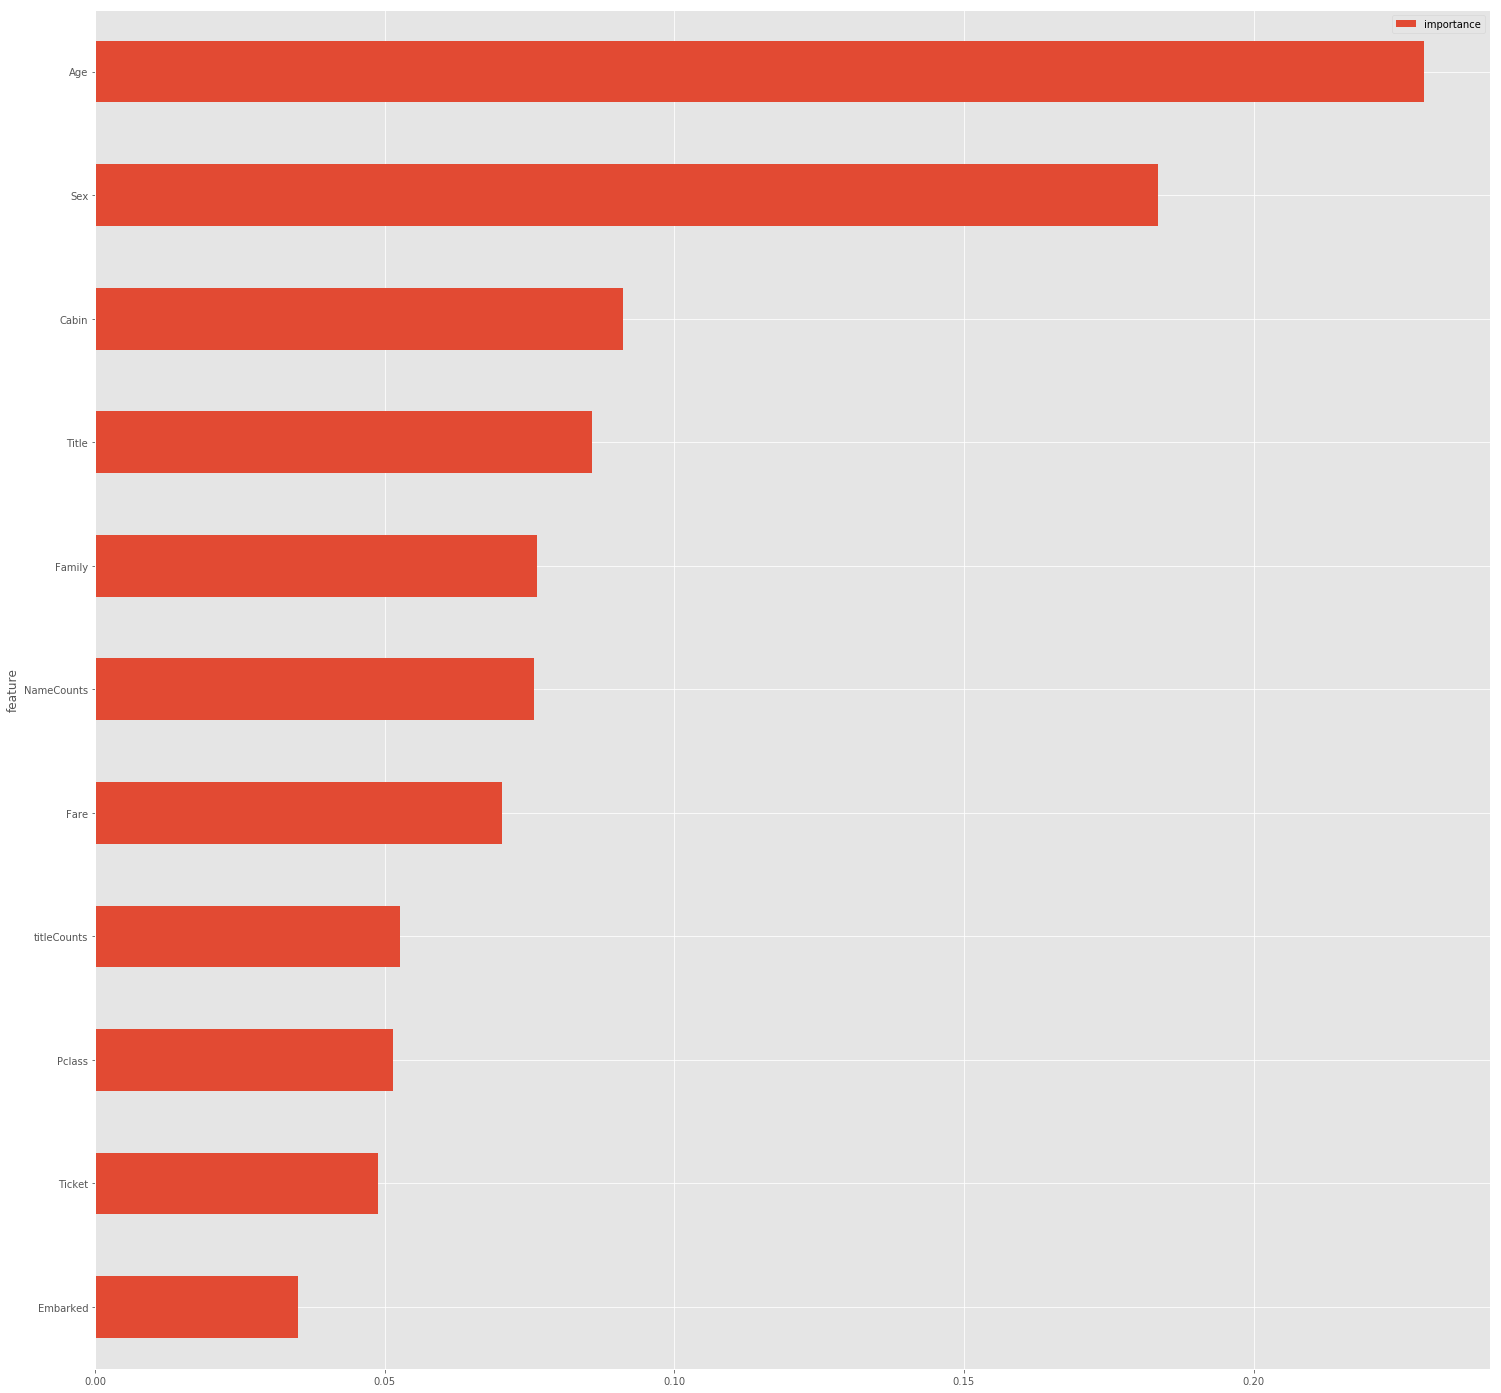

In [1897]:
clf = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [1898]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
train_reduced.shape

(891, 3)

In [1899]:
test_reduced = model.transform(X_test)
test_reduced.shape

(418, 3)

In [1903]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(Y_train, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(X_train, Y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 1000, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

In [1901]:
from sklearn.cross_validation import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

compute_score(model, X_train, Y_train, scoring='accuracy')

0.82941878234065192

In [1902]:
from sklearn.cross_validation import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

compute_score(model, train_reduced, Y_train, scoring='accuracy')

0.80475582020911518

In [1865]:
from sklearn.cross_validation import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

compute_score(model, X_train, Y_train, scoring='accuracy')

0.81932504121765226

In [1904]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('Titanic-submission.csv', index=False)

In [1181]:
print(test_reduced)

[[ 34.5      7.8292   1.     ...,   0.       1.       1.    ]
 [ 47.       7.       0.     ...,   0.       1.       1.    ]
 [ 62.       9.6875   1.     ...,   0.       0.       1.    ]
 ..., 
 [ 38.5      7.25     1.     ...,   0.       1.       1.    ]
 [ 30.       8.05     1.     ...,   0.       1.       1.    ]
 [  4.      22.3583   1.     ...,   0.       1.       0.    ]]


In [1439]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [1440]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, Y_train)

'''
Y_pred = cross_validation.cross_val_predict(XGBClassifier(n_estimators=100), X_train, Y_train, cv=10)
acc_random_forest = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )
'''

KeyboardInterrupt: 

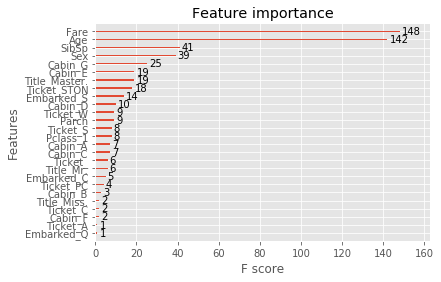

In [1438]:
from xgboost import plot_importance

trainModel = XGBClassifier()
trainModel.fit(X_train, Y_train)

plot_importance(trainModel)
plt.figure(figsize=(15,8))
plt.show()

In [1434]:
trainModel = XGBClassifier()
trainModel.fit(X_train, Y_train)
Y_pred = trainModel.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('Titanic-submission.csv', index=False)